## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Processing the data

In [2]:
df_deliveries = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [3]:
df_deliveries.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
df_matches = pd.read_csv("IPL Matches 2008-2020.csv")

In [5]:
df_matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [6]:
df_deliveries.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [7]:
df_matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [8]:
df_deliveries.size

3482424

In [9]:
df_matches.size

13872

In [10]:
df_deliveries.loc[df_deliveries['extra_runs']==0 , "extras_type"] = "no extra" 
df_deliveries.loc[df_deliveries['is_wicket']==0 , "dismissal_kind"] = "no dismissal" 
df_deliveries.loc[df_deliveries['is_wicket']==0 , "player_dismissed"] = "no dismissal" 
df_deliveries.loc[df_deliveries['is_wicket']==0 , "fielder"] = "no wicket" 
df_deliveries.loc[df_deliveries['dismissal_kind']== "bowled", "fielder"] = "no fielder involved"  
df_deliveries.loc[df_deliveries['dismissal_kind']== "lbw", "fielder"] = "no fielder involved" 
df_deliveries.loc[df_deliveries['dismissal_kind']== "retired hurt", "fielder"] = "no fielder involved" 
df_deliveries.loc[df_deliveries['dismissal_kind']== "caught and bowled", "fielder"] = "no fielder involved" 
df_deliveries.loc[df_deliveries['dismissal_kind']== "hit wicket", "fielder"] = "no fielder involved" 
df_deliveries.loc[df_deliveries['dismissal_kind']== "obstructing the field", "fielder"] = "no fielder involved" 

In [11]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    193468 non-null  object
 13  player_dismissed  193468 non-null  object
 14  fielder           193322 non-null  object
 15  extras_type       193468 non-null  object
 16  batting_team      193468 non-null  obj

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer= SimpleImputer(missing_values=np.nan,strategy='constant')

In [14]:
imputer

SimpleImputer(strategy='constant')

In [15]:
def nan_to_unknown():
    a=int(input("enter the index of column you want to replace null values with avg_value:"))
    c=df_deliveries.columns[a]
    y = df_deliveries[c].count()+df_deliveries[c].isna().sum()
    x = np.reshape(df_deliveries[c].values,(y,1))
    imputer = SimpleImputer(missing_values=np.nan,strategy="constant", fill_value='unknown data')
    imputer.fit(x)
    df_deliveries[c]=imputer.transform(x)

In [16]:
nan_to_unknown()

enter the index of column you want to replace null values with avg_value:14


In [17]:
nan_to_unknown()

enter the index of column you want to replace null values with avg_value:17


In [18]:
df_deliveries.shape

(193468, 18)

In [19]:
df_deliveries.isnull().sum()

id                  0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
batting_team        0
bowling_team        0
dtype: int64

In [20]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [21]:
14,17,1,3,10,11,13,14,12

(14, 17, 1, 3, 10, 11, 13, 14, 12)

In [22]:
def null_to_avg():
    a=int(input("enter the index of column you want to replace null values with avg_value:"))
    c=df_matches.columns[a]
    y = df_matches[c].count()+df_matches[c].isna().sum()
    x = np.reshape(df_matches[c].values,(y,1))
    imputer = SimpleImputer(missing_values=np.nan,strategy="constant", fill_value='unknown data')
    imputer.fit(x)
    df_matches[c]=imputer.transform(x)

In [23]:
null_to_avg()

enter the index of column you want to replace null values with avg_value:1


In [24]:
null_to_avg()

enter the index of column you want to replace null values with avg_value:3


In [25]:
null_to_avg()

enter the index of column you want to replace null values with avg_value:10


In [26]:
null_to_avg()

enter the index of column you want to replace null values with avg_value:11


In [27]:
null_to_avg()

enter the index of column you want to replace null values with avg_value:13


In [28]:
null_to_avg()

enter the index of column you want to replace null values with avg_value:14


In [29]:
def null_to_zero():
    a=int(input("enter the index of column you want to replace null values with avg_value:"))
    c=df_matches.columns[a]
    y = df_matches[c].count()+df_matches[c].isna().sum()
    x = np.reshape(df_matches[c].values,(y,1))
    imputer = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
    imputer.fit(x)
    df_matches[c]=imputer.transform(x)

In [30]:
null_to_zero()

enter the index of column you want to replace null values with avg_value:12


In [31]:
df_matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,unknown data,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,unknown data,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,unknown data,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,unknown data,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,unknown data,BF Bowden,K Hariharan


In [32]:
df_matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

## Count of matches played in each season

In [33]:
list_date=list(df_matches["date"])
n=list_date[1]
x=n[0:4]
count=0
t=[]
year=[]
for i in list_date:
    if(i[0:4]==x):
        count+=1
    else:
        year.append(x)
        t.append(count)
        print("no.of matches in", x ,'are', count)
        count=1
        x=i[0:4]
year.append(x)
t.append(count)
print("no.of matches in",x,'are',count)   

no.of matches in 2008 are 58
no.of matches in 2009 are 57
no.of matches in 2010 are 60
no.of matches in 2011 are 73
no.of matches in 2012 are 74
no.of matches in 2013 are 76
no.of matches in 2014 are 60
no.of matches in 2015 are 59
no.of matches in 2016 are 60
no.of matches in 2017 are 59
no.of matches in 2018 are 60
no.of matches in 2019 are 60
no.of matches in 2020 are 60


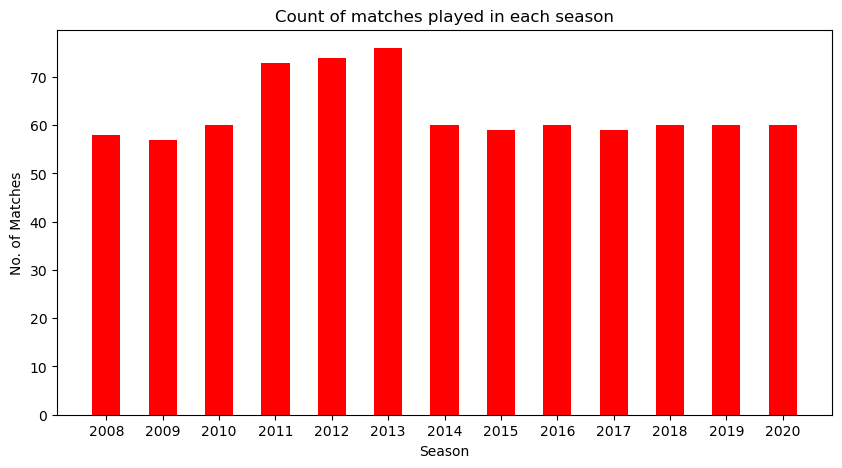

In [49]:
plt.bar(year,t, width=0.5,color=)
plt.rcParams["figure.figsize"] = (10 , 5)
plt.xlabel('Season')
plt.ylabel('No. of Matches')
plt.title("Count of matches played in each season")
plt.show()

## No.of Runs in each match(represented by match id) and Runs scored in each season

In [35]:
list_id=list(df_deliveries["id"])
x=df_deliveries.values
n=list_id[1]
total=0
y=0
runs_ofmatch={}
for i in list_id:
    if(i==n):
        total+=x[y][9]
    else:
        runs_ofmatch[n] = total
        print("no.of runs in", n ,'are', total)
        total=x[y][9]
        n=i
    y+=1
runs_ofmatch[n] = total
print("no.of runs in", n ,'are', total)

no.of runs in 335982 are 304
no.of runs in 335983 are 447
no.of runs in 335984 are 261
no.of runs in 335985 are 331
no.of runs in 335986 are 222
no.of runs in 335987 are 334
no.of runs in 335988 are 285
no.of runs in 335989 are 410
no.of runs in 335990 are 431
no.of runs in 335991 are 298
no.of runs in 335992 are 273
no.of runs in 335993 are 299
no.of runs in 335994 are 309
no.of runs in 335995 are 320
no.of runs in 335996 are 343
no.of runs in 335997 are 275
no.of runs in 335998 are 372
no.of runs in 335999 are 331
no.of runs in 336000 are 347
no.of runs in 336001 are 341
no.of runs in 336002 are 336
no.of runs in 336003 are 347
no.of runs in 336004 are 295
no.of runs in 336005 are 219
no.of runs in 336006 are 253
no.of runs in 336007 are 292
no.of runs in 336008 are 207
no.of runs in 336009 are 375
no.of runs in 336010 are 253
no.of runs in 336011 are 281
no.of runs in 336012 are 248
no.of runs in 336013 are 344
no.of runs in 336014 are 385
no.of runs in 336015 are 315
no.of runs in 

no.of runs in 1082644 are 337
no.of runs in 1082645 are 151
no.of runs in 1082646 are 312
no.of runs in 1082647 are 304
no.of runs in 1082648 are 176
no.of runs in 1082649 are 218
no.of runs in 1082650 are 257
no.of runs in 1136561 are 334
no.of runs in 1136562 are 333
no.of runs in 1136563 are 353
no.of runs in 1136564 are 252
no.of runs in 1136565 are 407
no.of runs in 1136566 are 213
no.of runs in 1136567 are 298
no.of runs in 1136568 are 314
no.of runs in 1136569 are 389
no.of runs in 1136570 are 277
no.of runs in 1136571 are 415
no.of runs in 1136572 are 390
no.of runs in 1136573 are 329
no.of runs in 1136574 are 380
no.of runs in 1136575 are 323
no.of runs in 1136576 are 371
no.of runs in 1136577 are 344
no.of runs in 1136578 are 317
no.of runs in 1136579 are 350
no.of runs in 1136580 are 360
no.of runs in 1136581 are 335
no.of runs in 1136582 are 282
no.of runs in 1136583 are 205
no.of runs in 1136584 are 412
no.of runs in 1136585 are 251
no.of runs in 1136586 are 383
no.of runs

### Here I used dictionary so that corresponding runs for their match id can be represented.

In [36]:
w=0
j=[]
ls_runs=list(runs_ofmatch.values())
for i in t:
    i+=w
    j.append(sum(ls_runs[w:i]))
    print(sum(ls_runs[w:i]))
    w=i

17937
16320
18864
21154
22453
22541
18909
18332
18862
18769
19901
19400
19352


In [37]:
sum(ls_runs)

252794

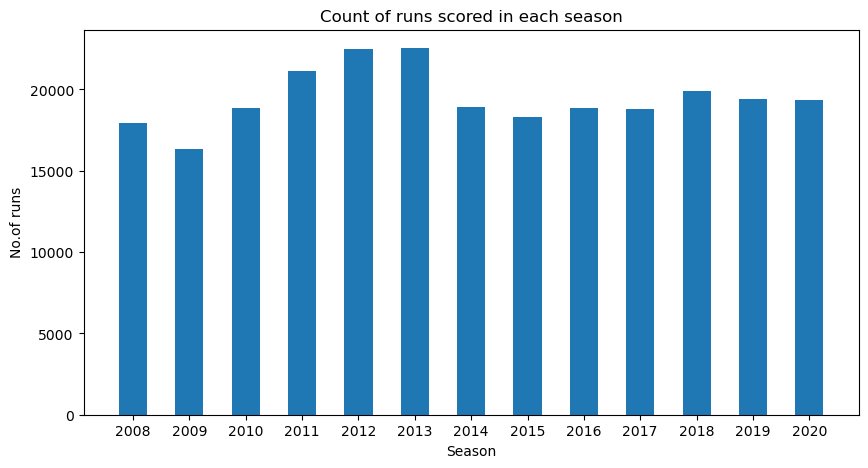

In [38]:
plt.bar(year,j, width=0.5)
plt.rcParams["figure.figsize"] = (10 ,5)
plt.xlabel('Season')
plt.ylabel('No.of runs')
plt.title("Count of runs scored in each season")
plt.show()

##  who has umpired the most?

In [39]:
df_matches["umpire1"].mode()

0    HDPK Dharmasena
Name: umpire1, dtype: object

In [40]:
df_matches["umpire2"].mode()

0    S Ravi
Name: umpire2, dtype: object

## Team won the most tosses

In [41]:
df_matches["toss_winner"].mode()

0    Mumbai Indians
Name: toss_winner, dtype: object

## What dose team decide after winning the toss?

In [42]:
id_=int(input("Enter the match id:"))
p=df_matches[df_matches['id']==id_]
print("The match is between",p["team1"][0],"and",p["team2"][0],".",p["toss_winner"][0],"won the toss and decided to",p["toss_decision"][0],"first.")

Enter the match id:335982
The match is between Royal Challengers Bangalore and Kolkata Knight Riders . Royal Challengers Bangalore won the toss and decided to field first.


In [43]:
df_matches['toss_decision'].value_counts()

field    496
bat      320
Name: toss_decision, dtype: int64

## How dose the toss decision vary across seasons?

In [44]:
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,unknown data,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,unknown data,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,unknown data,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,unknown data,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,unknown data,BF Bowden,K Hariharan


In [47]:
w=0
for i in t[0:1]:
    i+=w
    print(df_matches.values[w:i])
    w=i

[[335982 'Bangalore' '2008-04-18' 'BB McCullum' 'M Chinnaswamy Stadium' 0
  'Royal Challengers Bangalore' 'Kolkata Knight Riders'
  'Royal Challengers Bangalore' 'field' 'Kolkata Knight Riders' 'runs'
  140.0 'N' 'unknown data' 'Asad Rauf' 'RE Koertzen']
 [335983 'Chandigarh' '2008-04-19' 'MEK Hussey'
  'Punjab Cricket Association Stadium, Mohali' 0 'Kings XI Punjab'
  'Chennai Super Kings' 'Chennai Super Kings' 'bat' 'Chennai Super Kings'
  'runs' 33.0 'N' 'unknown data' 'MR Benson' 'SL Shastri']
 [335984 'Delhi' '2008-04-19' 'MF Maharoof' 'Feroz Shah Kotla' 0
  'Delhi Daredevils' 'Rajasthan Royals' 'Rajasthan Royals' 'bat'
  'Delhi Daredevils' 'wickets' 9.0 'N' 'unknown data' 'Aleem Dar'
  'GA Pratapkumar']
 [335985 'Mumbai' '2008-04-20' 'MV Boucher' 'Wankhede Stadium' 0
  'Mumbai Indians' 'Royal Challengers Bangalore' 'Mumbai Indians' 'bat'
  'Royal Challengers Bangalore' 'wickets' 5.0 'N' 'unknown data'
  'SJ Davis' 'DJ Harper']
 [335986 'Kolkata' '2008-04-20' 'DJ Hussey' 'Eden Gar

In [ ]:
df_matches